In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

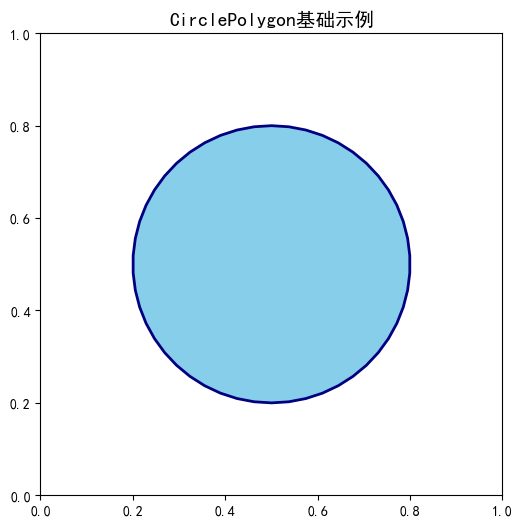

In [3]:
from matplotlib.patches import CirclePolygon

fig, ax = plt.subplots(figsize=(6, 6))

# 使用CirclePolygon绘制圆形
circle = CirclePolygon((0.5, 0.5),           # 圆心坐标（x, y）
                       radius=0.3,           # 圆的半径
                       resolution=50,        # 多边形的边数（50条边，视觉上接近完美圆形）
                       facecolor='skyblue',  # 圆形内部填充色
                       edgecolor='navy',     # 圆形边框颜色
                       linewidth=2           # 边框线宽
                      )

# 将创建的圆形添加到子图中，使其在图中显示
ax.add_patch(circle)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title('CirclePolygon基础示例', fontsize=14)
ax.set_aspect('equal')
plt.show()

# 2、使用示例：

### 示例 1：边数对图形的影响

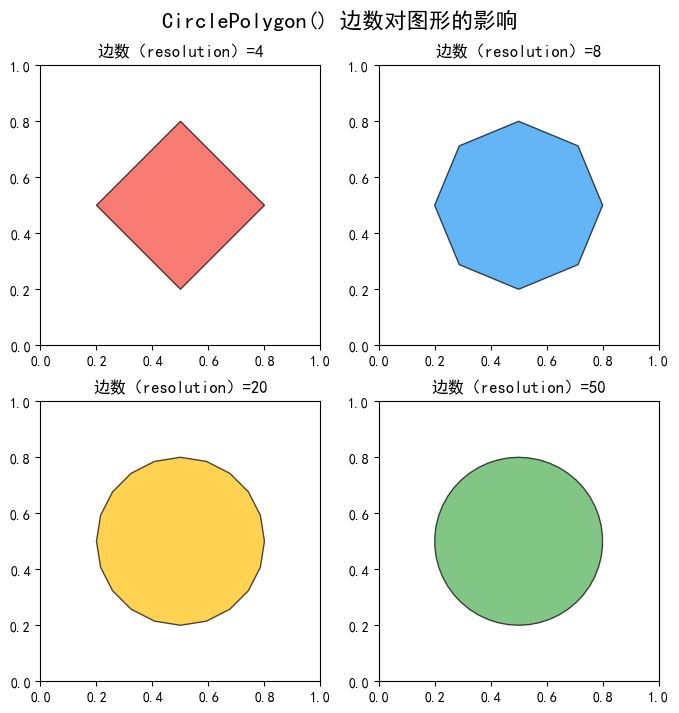

In [4]:
from matplotlib.patches import CirclePolygon

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()  # 将2x2的axes数组展平，方便循环

# 定义要测试的边数
resolutions = [4, 8, 20, 50]
colors = ['#F44336', '#2196F3', '#FFC107', '#4CAF50']

for idx, (res, color) in enumerate(zip(resolutions, colors)):
    # 创建CirclePolygon对象
    circle = CirclePolygon((0.5, 0.5), radius=0.3, resolution=res)
    circle.set_facecolor(color)
    circle.set_edgecolor('black')
    circle.set_alpha(0.7) 
    
    # 添加到子图并调整样式
    axes[idx].add_patch(circle)
    axes[idx].set_xlim(0, 1)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_aspect('equal')
    axes[idx].set_title(f'边数（resolution）={res}', fontsize=12)

plt.suptitle('CirclePolygon() 边数对图形的影响', fontsize=16, y=0.95)
plt.show()

### 示例 2：动态修改圆形属性

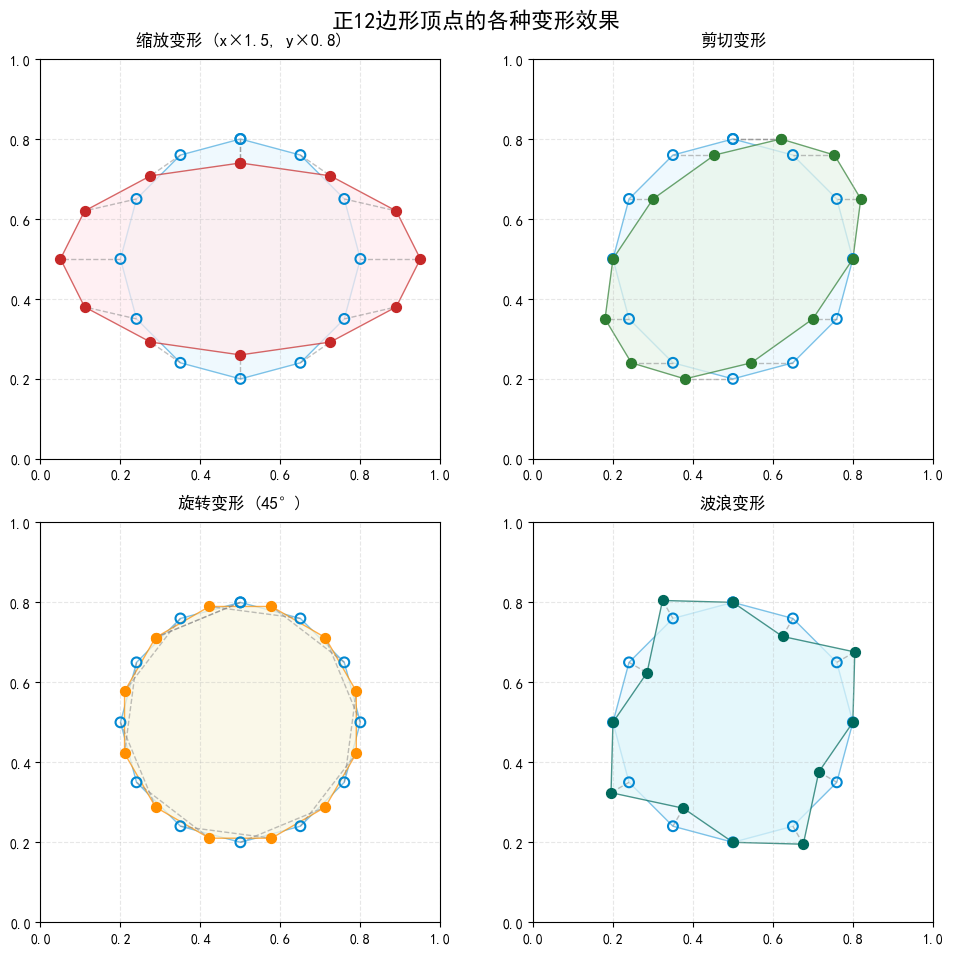

In [5]:
from matplotlib.patches import CirclePolygon, Polygon

# 1. 创建原始圆形多边形
center = (0.5, 0.5)
radius = 0.3
resolution = 12
original_circle = CirclePolygon(center, radius=radius, resolution=resolution)
original_verts = np.array(original_circle.get_verts())

# 2. 定义多种变形方法
def scale_vertices(vertices, center, x_scale=1.0, y_scale=1.0):
    """沿x轴和y轴缩放顶点坐标"""
    scaled = vertices.copy()
    # 以中心点为基准进行缩放
    scaled[:, 0] = center[0] + (vertices[:, 0] - center[0]) * x_scale
    scaled[:, 1] = center[1] + (vertices[:, 1] - center[1]) * y_scale
    return scaled

def shear_vertices(vertices, center, shear_factor=0.3):
    """剪切变换"""
    sheared = vertices.copy()
    # 沿x轴方向的剪切，与y坐标相关
    sheared[:, 0] = vertices[:, 0] + shear_factor * (vertices[:, 1] - center[1])
    return sheared

def rotate_vertices(vertices, center, angle_deg=30):
    """旋转顶点坐标"""
    rotated = vertices.copy()
    angle_rad = np.radians(angle_deg)
    # 旋转矩阵
    rot_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    
    # 先平移到原点，旋转后再平移回去
    translated = vertices - center
    rotated = np.dot(translated, rot_matrix.T) + center
    return rotated

def wave_vertices(vertices, center, amplitude=0.05, frequency=3):
    """波浪形变形"""
    waved = vertices.copy()
    # 计算每个顶点与x轴的夹角
    angles = np.arctan2(vertices[:, 1] - center[1], vertices[:, 0] - center[0])
    # 基于角度创建波浪效果
    radius_variation = amplitude * np.sin(frequency * angles)
    # 计算新的顶点位置
    for i in range(len(waved)):
        # 原始距离
        dist = np.sqrt((vertices[i, 0]-center[0])**2 + (vertices[i, 1]-center[1])** 2)
        # 新距离（添加波动）
        new_dist = dist + radius_variation[i]
        # 计算新坐标
        waved[i, 0] = center[0] + new_dist * np.cos(angles[i])
        waved[i, 1] = center[1] + new_dist * np.sin(angles[i])
    return waved

# 3. 生成多种变形后的顶点集
scaled_verts = scale_vertices(original_verts, center, x_scale=1.5, y_scale=0.8)
sheared_verts = shear_vertices(original_verts, center, shear_factor=0.4)
rotated_verts = rotate_vertices(original_verts, center, angle_deg=45)
waved_verts = wave_vertices(original_verts, center, amplitude=0.06, frequency=4)

# 4. 创建画布和子图
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

# 5. 定义图形样式
original_style = {'facecolor': '#E1F5FE', 'edgecolor': '#0288D1', 'alpha': 0.5}
transformed_styles = [
    {'facecolor': '#FFEBEE', 'edgecolor': '#C62828', 'alpha': 0.7},  # 缩放
    {'facecolor': '#E8F5E9', 'edgecolor': '#2E7D32', 'alpha': 0.7},  # 剪切
    {'facecolor': '#FFF8E1', 'edgecolor': '#FF8F00', 'alpha': 0.7},  # 旋转
    {'facecolor': '#E0F7FA', 'edgecolor': '#00695C', 'alpha': 0.7}   # 波浪
]

# 6. 绘制原始图形和变形图形
transformations = [
    (scaled_verts, "缩放变形 (x×1.5, y×0.8)"),
    (sheared_verts, "剪切变形"),
    (rotated_verts, "旋转变形 (45°)"),
    (waved_verts, "波浪变形")
]

for i, (transformed_verts, title) in enumerate(transformations):
    # 绘制原始图形（半透明作为参考）
    original_patch = Polygon(original_verts, **original_style)
    axes[i].add_patch(original_patch)
    
    # 绘制变形图形
    transformed_patch = Polygon(transformed_verts,** transformed_styles[i])
    axes[i].add_patch(transformed_patch)
    
    # 标记原始顶点（空心圆）
    axes[i].scatter(original_verts[:, 0], original_verts[:, 1], 
                    color=original_style['edgecolor'], s=50, 
                    facecolors='none', linewidths=1.5, zorder=3)
    
    # 标记变形后的顶点（实心圆）
    axes[i].scatter(transformed_verts[:, 0], transformed_verts[:, 1], 
                    color=transformed_styles[i]['edgecolor'], s=50, 
                    zorder=4)
    
    # 绘制顶点对应关系连线
    for orig, trans in zip(original_verts, transformed_verts):
        axes[i].plot([orig[0], trans[0]], [orig[1], trans[1]], 
                    'gray', linestyle='--', linewidth=1, alpha=0.5, zorder=2)
    
    # 配置坐标轴
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)
    axes[i].set_aspect('equal')
    axes[i].set_title(title, fontsize=12, pad=10)
    axes[i].grid(True, linestyle='--', alpha=0.3)

# 7. 添加主标题
plt.suptitle(f'正{resolution}边形顶点的各种变形效果', fontsize=16, y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 调整顶部间距，避免标题重叠
plt.show()